# Learning outcomes
1. Load, display and save images
2. Load, show, and save videos
3. Resize images

## Why OpenCV?
- Compatible in multiple MAJOR OS, like Windows, Linux and MACOS, can be written in different languages: C++, Python and Java.
- Interoperable with Numpy modules, thereby faster computation of image array
- Large community support, alot of resources (articles and stackoverflow posts).

## Image formats
- JPEG (.jpg，.jpeg，.jfif)
    - photos taken from camera
- PNG (.png.)
    - website,larger file size compare to JPEG.
- tiff (.tif)
    - high quality printing, large file size.
- bmp (.bmp)
    - multiple uses, large file size.
- GIF (.gif)(openCV can't deal with this format)
    - animations, shallow color depth.
- webp (.webp)
    - smaller file size compared to JPEG and PNG, IE 11 not supported.

## Setup

In [1]:
import sys
# at least Python 3.7
assert sys.version_info >= (3,7)

import numpy as np
import cv2 as cv

In [2]:
#check OpenCV version
print(cv.__version__)

4.8.0


## Load and show images

In [3]:
img = cv.imread("images/lena.jfif")
#second argument : 1 (default), 0 (grayscale), -1(cv.IMREAD_UNCHANGED)
grayscale = cv.imread("images/lena.jfif", 0)

cv.imshow("lena_color", img)
cv.imshow("lena_grayscale", grayscale)
cv.waitKey(0)   #key binding function: wait for user response
cv.destroyAllWindows()

In [4]:
def show_img(window_name, img):
    """2 arguments: window name and imgae"""
    cv.imshow(window_name, img)
    cv.waitKey(0)   #key binding function: wait for user response
    cv.destroyAllWindows()

In [5]:
#PNG
img = cv.imread("images/lena.png")

show_img("lena", img)

In [6]:
#difference between jpeg and png
img_jpeg = cv.imread("images/lena.jpg", -1)
img_png = cv.imread("images/lena.png", -1)

print (f"shape of jpeg image:{img_jpeg.shape}")
print (f"shape of png image:{img_png.shape}")


shape of jpeg image:(225, 225, 3)
shape of png image:(225, 225, 4)


## GIF
import new module

In [7]:
!pip install imageio


[notice] A new release of pip is available: 23.1.2 -> 23.2
[notice] To update, run: C:\Users\celin\AppData\Local\Programs\Python\Python311\python.exe -m pip install --upgrade pip


In [8]:
import imageio

In [9]:
#gif
GIF = imageio.mimread("images/rotating_earth_large.gif")
# openCV import the image as BGR
# change to BGR from RGB
imgs = [cv.cvtColor(img, cv.COLOR_RGB2BGR)for img in GIF]

for img in imgs:
    cv.imshow("GIF", img)
    cv.waitKey(200)    #wait for 2 second, if no user input, it will just skip
    
cv.destroyAllWindows()

## Save Images
```
cv.imwrite(filepath, img)
```

In [10]:
# a more formalized approach
img = cv.imread(cv.samples.findFile("images/lena.jfif"))

if img is None:
    sys.exit("Not a valid filepath")
    
cv.imshow("img", img)
k = cv.waitKey(0) & 0xFF
if k == ord('s'):  #press 's' button
    cv.imwrite("lena_save.jpg", img)

cv.destroyAllWindows()

## Same operations on videos
Load and show videos

In [11]:
cap = cv.VideoCapture("videos/img_pexels.mp4")

if not cap.isOpened():
    sys.exit("No video file found")
cv.namedWindow("frame", cv.WINDOW_NORMAL)    
while True:
    ret, frame = cap.read()
    
    if not ret:
        print("No frame received")
        break
        
    cv.imshow("frame", frame)
    k = cv.waitKey(1) & 0xFF
    if k == 27:  # esc key
        break
        
cap.release()
cv.destroyAllWindows()

In [12]:
## webcam

cap = cv.VideoCapture(0)  #setting for webcam

if not cap.isOpened():
    sys.exit("No webcam file found")
    

#save video object
#arguments : filepath, fourcc, fps, width, height
#fourcc = IP/algorithm for compression and decompression of the video
fourcc = cv.VideoWriter_fourcc("M", "J", "P", "G")
fps = 15
w, h = int(cap.get(3)), int(cap.get(4))
out = cv.VideoWriter("videos/out.avi", fourcc, fps, (w, h))

while True:
    ret, frame = cap.read()
    
    if not ret:
        print("No frame received")
        break
    out.write(frame)    
    cv.imshow("frame", frame)
    k = cv.waitKey(1) & 0xFF
    if k == 27:  # esc key
        break
        
cap.release()
out.release()
cv.destroyAllWindows()

In [13]:
import time

In [14]:
cap = cv.VideoCapture("videos/img_pexels.mp4")

if not cap.isOpened():
    sys.exit("No video file found")
cv.namedWindow("frame", cv.WINDOW_NORMAL)  
start = time.time()
while True:
    ret, frame = cap.read()
    
    if not ret:
        print("No frame received")
        break
        
    cv.imshow("frame", frame)
    k = cv.waitKey(1) & 0xFF
    if k == 27:  # esc key
        break
end = time.time()        
#cap.release()
cv.destroyAllWindows()

In [15]:
print(f"The actual frame rate from the file: {cap.get(5)}")
n_frames = cap.get(7)
print(f"The fps if stream using OpenCV: {n_frames/ (end-start)}") #total frame / the time that I set

The actual frame rate from the file: 60.0
The fps if stream using OpenCV: 680.7149880585811


## Image resizing
1. set arbitray dimension (w, h)
2. scale factor

In [16]:
# 1 method
img = cv.imread("images/soccer.jpg")

new_height = 450
new_width = 300

#third argument: fx, 4th: fy, 5th: interpolation methods(default:bilinear)
img_resize = cv.resize(img, (new_width, new_height))

cv.imshow("original", img)
show_img("resize", img_resize)

In [17]:
img.shape

(1200, 800, 3)

In [18]:
# 2 method: scale factor
img = cv.imread("images/lena.jfif")
    
img_resize = cv.resize(img, None, fx = 1.5, fy=1.5)

cv.imshow("original", img)
show_img("resize", img_resize)

## Exercise 1
1. Load and display the image 'dog.jfif'. Save the image in png format

In [19]:
img = cv.imread(cv.samples.findFile("images/dog.jfif"))

if img is None:
    sys.exit("Not a valid filepath")
    
cv.imshow("img", img)
k = cv.waitKey(0) &0xFF
if k == ord('s'): 
    cv.imwrite("dog.png", img)
    
cv.destroyAllWindows()

## Exercise 2
2. Suggest 2 ways and write codes to display 2 images simultaneously. You can use any image snapped from your handphone, downloaded from internet or images from weekly materials on MS teams. The 2 images are original color image and its corresponding grayscale image.

In [20]:
# 1st method : cv.imshow() called twice
img = cv.imread("images/Shxtou.jpg")
#grayscale = cv.imread("images/Shxtou.jpg", 0)
grayscale = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

cv.imshow("Shxtou_color", img)
cv.imshow("Shxtou_grayscale", grayscale)
cv.waitKey(0)
cv.destroyAllWindows()

In [21]:
# 2nd Method :  import external module: matplotlib
import matplotlib.pyplot as plt

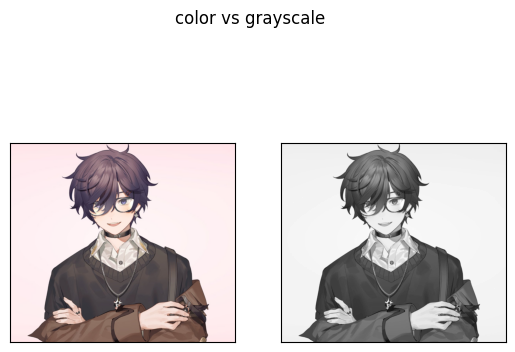

In [22]:
img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)

plt.subplot(121) # 1: 1 row, 2: 2 colomn, 1: work on 1st figure
plt.imshow(img_rgb)
plt.xticks([]), plt.yticks([])
plt.subplot(122)
plt.imshow(grayscale, cmap = plt.cm.gray)
plt.xticks([]), plt.yticks([])
plt.suptitle("color vs grayscale")
plt.show()


In [23]:
# 3rd Method : concatenate (join the array)
gray = cv.cvtColor(grayscale, cv.COLOR_GRAY2BGR)

#img_combined = np.hstack((img, gray))  #hstack: join horizontally
img_combined = np.concatenate((img, gray), axis=1)
show_img("joined", img_combined)

## Exercise 3
3. Write codes that performs the following:
    - Load the video"img_pexels.mp4" into the Python environment, resize it and display the videos with smaller frames(The frames can be any size, as long as it is smaller). You can specify an arbitrary frame rate.
    - Save it as an separate files: "smaller_img_pexels.avi" or "smaller_img_pexels.mp4"

In [27]:
video = cv.VideoCapture("videos/img_pexels.mp4")

if not video.isOpened():
    sys.exit("No video file found")
cv.namedWindow("Original Frame", cv.WINDOW_NORMAL)
cv.namedWindow("Smaller Frame", cv.WINDOW_NORMAL)  

# get the original frame
w, h = int(video.get(3)), int(video.get(4))

# Define a smaller frame
new_w = int(w / 2)
new_h = int(h / 4)

# frame rate
rate = 1

# save video object
fourcc = cv.VideoWriter_fourcc(*'mp4v')
fps = 15
out=cv.VideoWriter("videos/smaller_img_pexels.mp4", fourcc, fps, (new_w, new_h))
while True:
    ret, frame  = video.read()
    
    if not ret:
        print("No frame received")
        break

    # Resize the frame to a smaller size
    small_frame = cv.resize(frame, (new_w, new_h))
    
    out.write(small_frame)
    
    cv.imshow("Original Frame", frame)
    cv.imshow("Smaller Frame", small_frame)
    k = cv.waitKey(rate) & 0xFF
    if k == 27:
        break
        
cap.release()
out.release()
cv.destroyAllWindows()


No frame received


## Exercise 4
4. Enlarge the image"dog.jfif" by using different techniques:
    1) Linear interpolation
    2) Cubic interpolation
    3) nearest neighbour interpolation
Comment on the upscale of all the outputs

In [30]:
# 1st method: Linear interpolation
image = cv.imread("images/dog.jfif")

new_h = image.shape[0] * 2  #[0] represent the height of image
new_w = image.shape[1] * 2  #[1] represent the width of the image

#Perform linear interpolation to enlarge the image
#consider the values of the nearest neighbour pixels to estimate the value of a new pixel
# cv.INTER_LINEAR indicating the use of linear interpolation for the resizing process
linear = cv.resize(image, (new_w, new_h), interpolation = cv.INTER_LINEAR)

cv.imshow("Original Image", image)
cv.imshow("Linear Interpolation Enlarge Image", linear)

cv.waitKey(0)
cv.destroyAllWindows()

In [29]:
# 2nd Method: Cubic Interpolation
image1 = cv.imread("images/dog.jfif")

new_h = image1.shape[0] * 2  #[0] represent the height of image
new_w = image1.shape[1] * 2  #[1] represent the width of the image

#Perofmr Cubic interpolation to enlarge the image
# selects a alrger neighbourhood of pixels to estimate the value of a new pixel
# cv.INTER_CUBIC indicating the use of CUBIC interpolation for the resizing process
cubic = cv.resize(image1, (new_w, new_h), interpolation = cv.INTER_CUBIC)

cv.imshow("Original Image", image1)
cv.imshow("Linear Interpolation Enlarge Image", cubic)

cv.waitKey(0)
cv.destroyAllWindows()

In [31]:
#3rd Method: Nearest Neighbour Interpolation
image2 = cv.imread("images/dog.jfif")

new_h = image2.shape[0] * 2  #[0] represent the height of image
new_w = image2.shape[1] * 2  #[1] represent the width of the image

#Perofmr nearest neighbour interpolation to enlarge the image
# selects the value of the nearest pixel in the original image and assigns it to the corresponding pixel
# cv.INTER_NEAREST indicating the use of linear interpolation for the resizing process
nearest = cv.resize(image2, (new_w, new_h), interpolation = cv.INTER_NEAREST)

cv.imshow("Original Image", image2)
cv.imshow("Linear Interpolation Enlarge Image", nearest)

cv.waitKey(0)
cv.destroyAllWindows()